Ονοματεπώνυμο φοιτητή: Παναγιώτης Κωνσταντίνος Κακκαβάς

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pprint import pprint
from random import sample

from triton.language import trans

In [101]:
!pip install munkres
from munkres import Munkres


def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert (l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i, j] = -m_ij.size
    return m


def translate_clustering(clt, mapper):
    return np.array([mapper[i] for i in clt])


def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = {old: new for (old, new) in indexes}

    for old, new in mapper.items():
        print("map: %s --> %s" % (old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [102]:
img_gt = np.load('indian_pines_gt.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [103]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

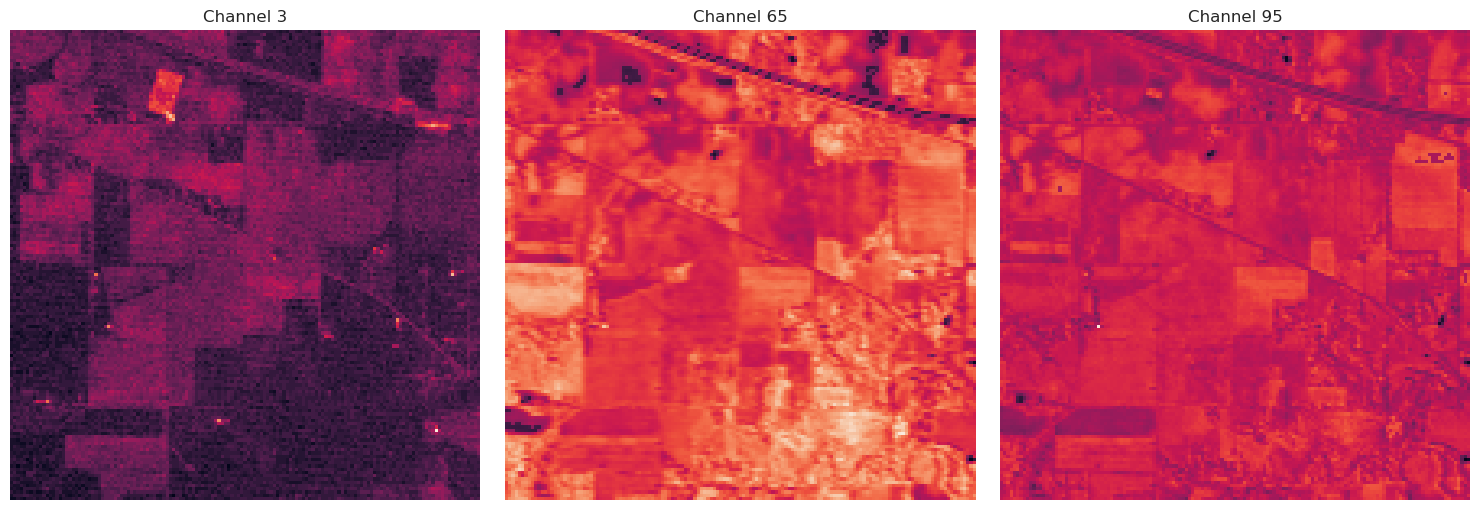

/tmp/ipykernel_9061/2249640516.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', len(classes))


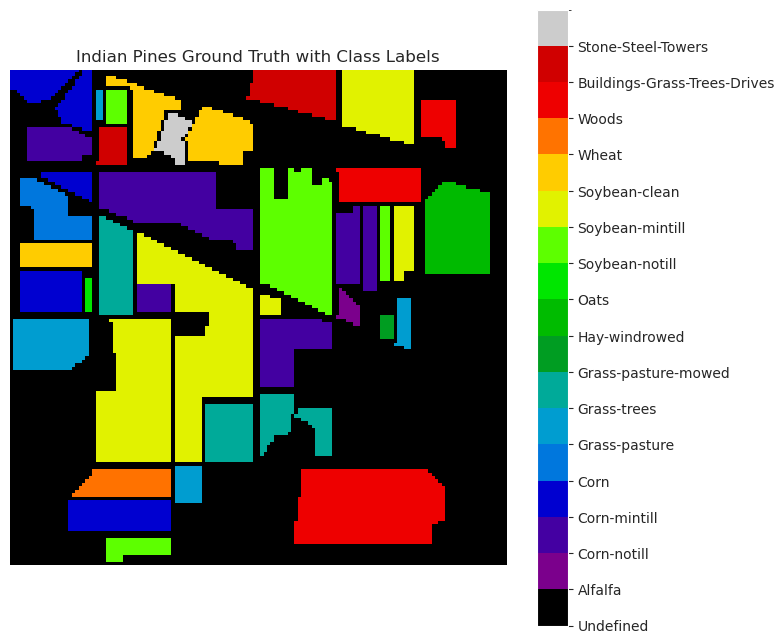

The hyperspectral images have shape (h,w,c):  (145, 145, 200)
The number of unique crops in the images (found by ground truth is):  17
{'Alfalfa': (46, '0.22%'),
 'Buildings-Grass-Trees-Drives': (386, '1.84%'),
 'Corn': (237, '1.13%'),
 'Corn-mintill': (830, '3.95%'),
 'Corn-notill': (1428, '6.79%'),
 'Grass-pasture': (483, '2.30%'),
 'Grass-pasture-mowed': (28, '0.13%'),
 'Grass-trees': (730, '3.47%'),
 'Hay-windrowed': (478, '2.27%'),
 'Oats': (20, '0.10%'),
 'Soybean-clean': (593, '2.82%'),
 'Soybean-mintill': (2455, '11.68%'),
 'Soybean-notill': (972, '4.62%'),
 'Stone-Steel-Towers': (93, '0.44%'),
 'Undefined': (10776, '51.25%'),
 'Wheat': (205, '0.98%'),
 'Woods': (1265, '6.02%')}


In [104]:
imgs = np.load('indian_pines_corrected.npy')

# 2b Each channel represents a different wavelength of the electromagnetic spectrum, capturing different information about the area imaged.
channels_to_plot = [3, 65, 95]
fig, axes = plt.subplots(1, len(channels_to_plot), figsize=(15, 5))
for i, channel in enumerate(channels_to_plot):
    ax = axes[i]
    ax.imshow(imgs[:, :, channel - 1])  # channel index is zero-based
    ax.set_title(f'Channel {channel}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# 2d Labeled Ground Truth
cmap = plt.cm.get_cmap('nipy_spectral', len(classes))
norm = mcolors.BoundaryNorm(range(len(classes) + 1), cmap.N)

plt.figure(figsize=(8, 8))
temp_img = plt.imshow(img_gt, cmap=cmap, norm=norm)
plt.axis('off')
plt.title('Indian Pines Ground Truth with Class Labels')

cbar = plt.colorbar(temp_img, ticks=np.arange(len(classes)))
cbar.ax.set_yticklabels(classes)

plt.show()

# 2a (h=145, w=145, channels=200)
print('The hyperspectral images have shape (h,w,c): ', imgs.shape)
# 2c img_gt contains all the numbers from 0 to 17 so all the 16 possible classes
print('The number of unique crops in the images (found by ground truth is): ', len(np.unique(img_gt)))
# 2e class:pixel dict
pixel_counts = {
    class_name: (np.sum(img_gt == class_index), "{:.2f}%".format(np.sum(img_gt == class_index) / (1.45 * 145))) for
    class_index, class_name in enumerate(classes)}
pprint(pixel_counts)


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

(21025, 200) (21025,)
{'pixel1': array([2563, 3880, 4045, 3887, 4035, 4330, 4331, 4164, 4048, 3894, 3749,
       3627, 3593, 3706, 3760, 3673, 2785, 2563, 3153, 3018, 2930, 2848,
       2738, 2633, 2592, 2462, 2430, 2347, 2281, 2218, 2458, 2243, 2445,
       2990, 2730, 4133, 5280, 6502, 6633, 4796, 7078, 7242, 6828, 6757,
       6251, 5760, 6044, 6570, 6472, 6448, 6361, 6380, 6228, 5144, 4904,
       4778, 4269, 2511, 2695, 2884, 3715, 4308, 4830, 5141, 5051, 5079,
       5046, 5050, 5003, 4953, 4860, 4743, 4652, 4419, 3892, 3153, 1854,
       1658, 1936, 1776, 2264, 2775, 2856, 2809, 2881, 2888, 2938, 3022,
       3105, 3095, 2974, 2629, 2739, 2867, 2704, 2841, 2826, 2630, 2326,
       2081, 1689, 1429, 1065, 1017, 1033, 1034, 1048, 1086, 1121, 1086,
       1115, 1206, 1273, 1356, 1409, 1444, 1466, 1492, 1513, 1480, 1496,
       1518, 1515, 1525, 1553, 1563, 1537, 1534, 1522, 1504, 1495, 1469,
       1450, 1414, 1390, 1356, 1320, 1302, 1272, 1221, 1176, 1118, 1051,
       1019, 1010,

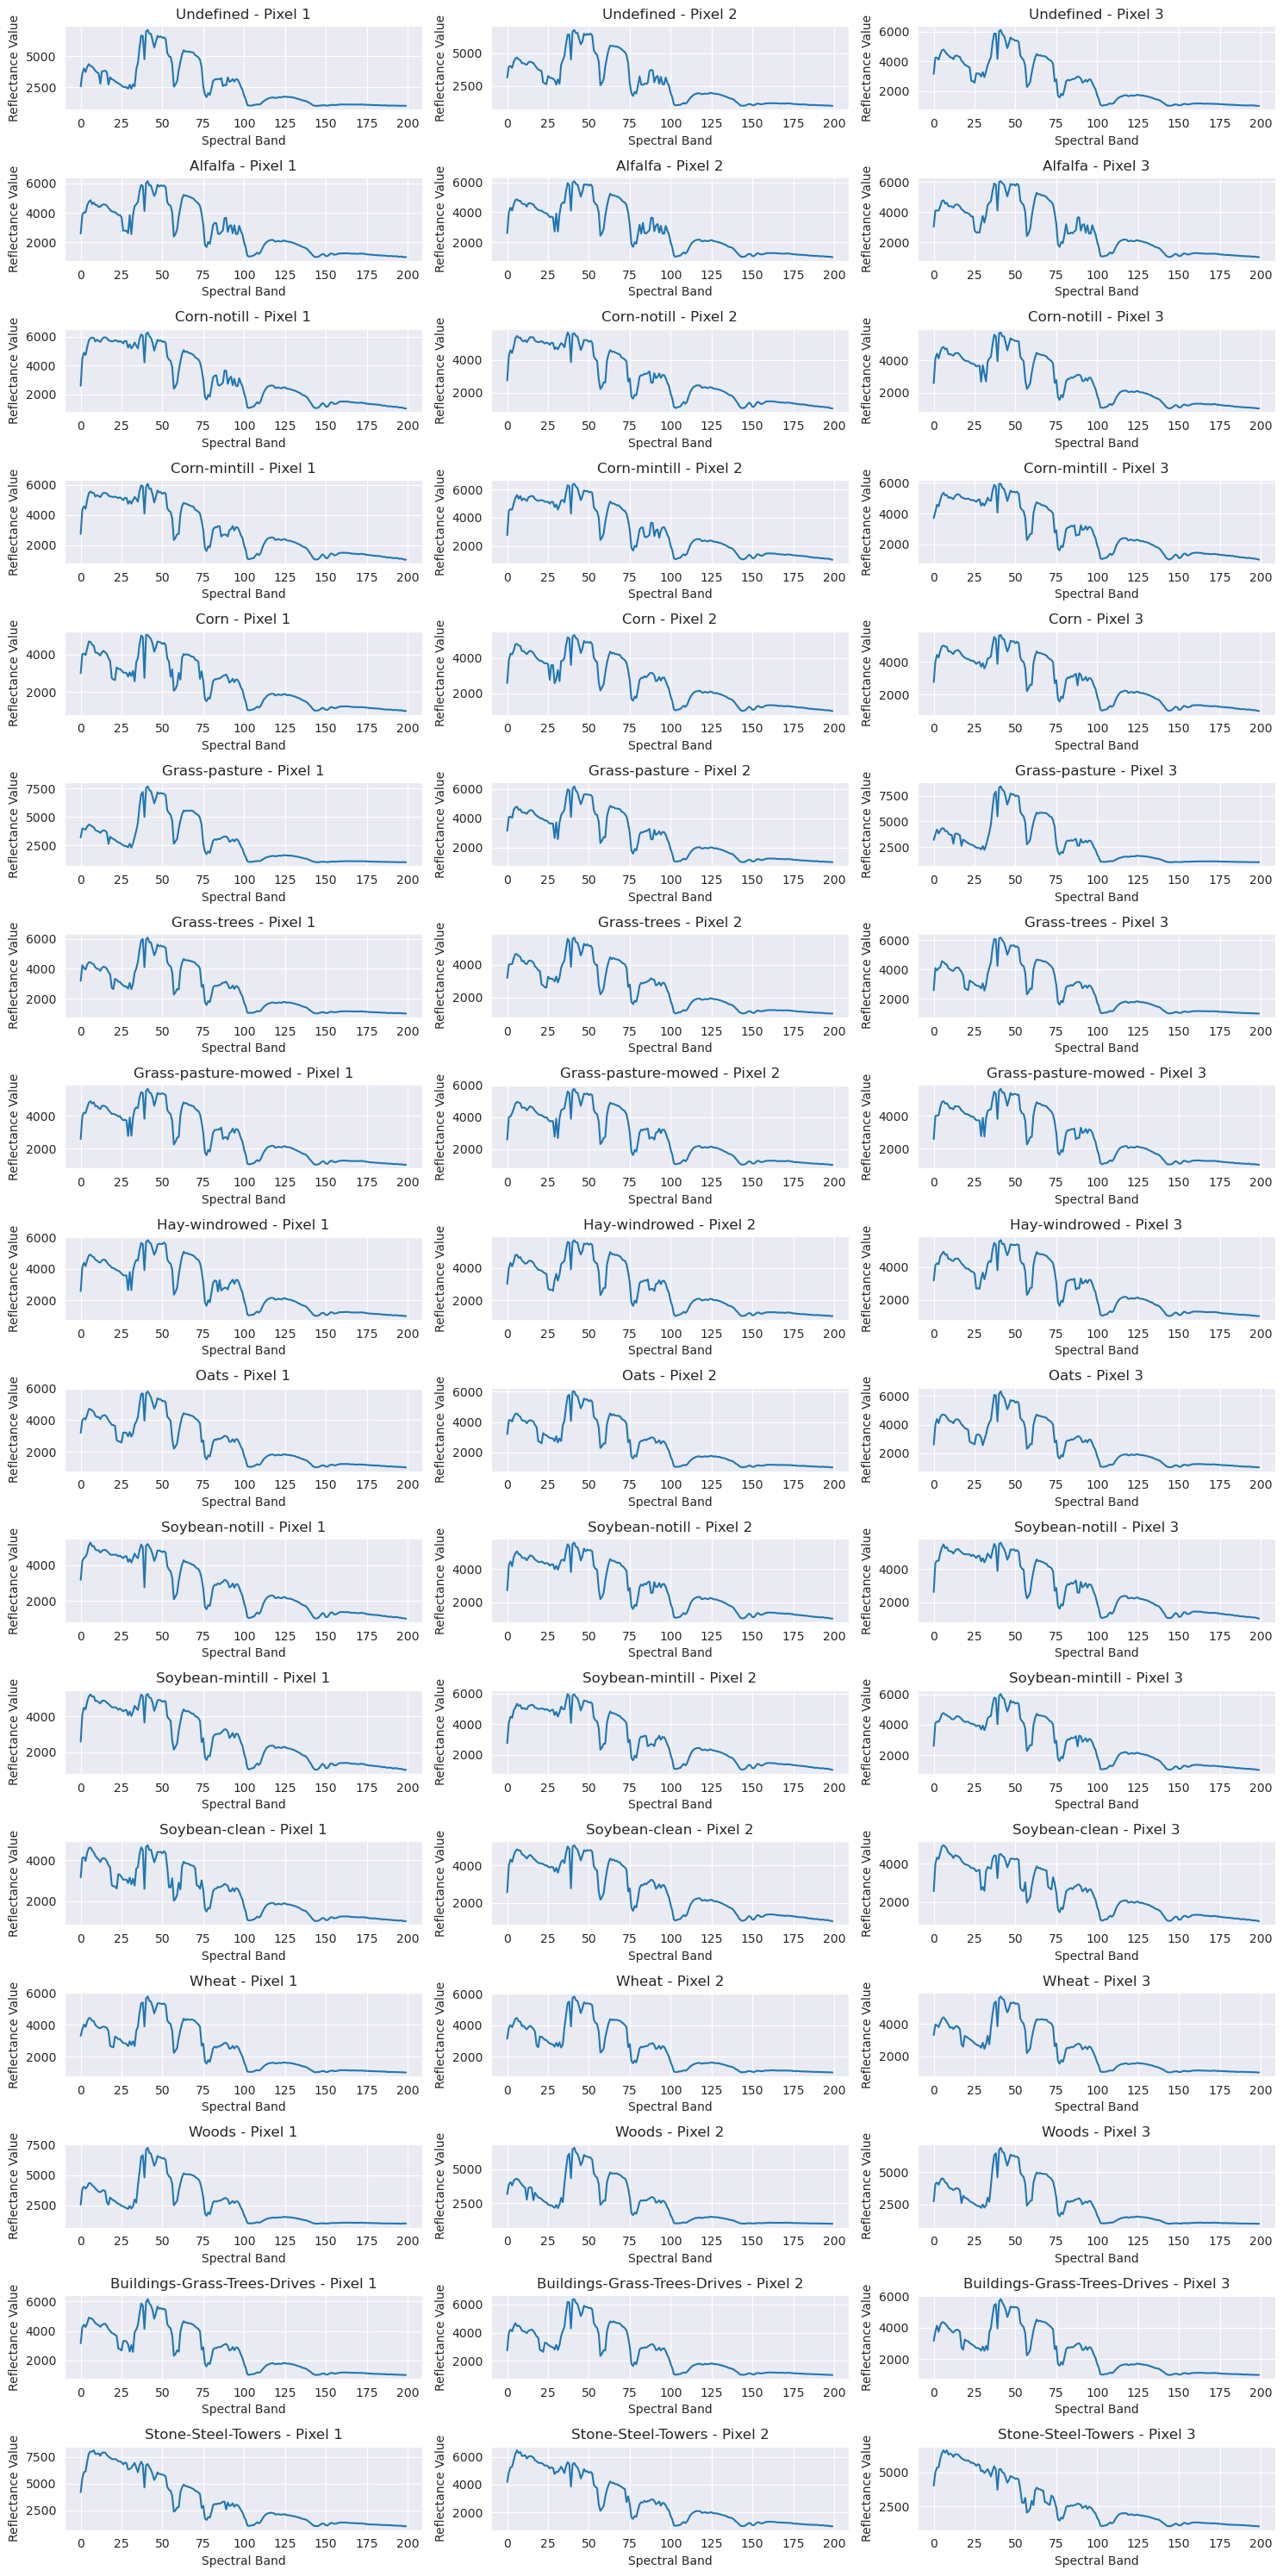

In [105]:
# 3a flatten the image
imgs, img_gt = np.reshape(imgs, (-1, 200)), np.reshape(img_gt, (-1))
print(imgs.shape, img_gt.shape)

# 3b, 3c, 3d dict of class: idx1-3: signature1-3 
hyperspectral_signatures = {}

for class_index, class_name in enumerate(classes):
    class_pixel_idxs = sample(list(np.where(img_gt == class_index)[0]), 3)

    hyperspectral_signatures[class_name] = {
        f"pixel{i + 1}": imgs[idx] for i, idx in enumerate(class_pixel_idxs)
    }

pprint(hyperspectral_signatures['Woods'])

# 3e plot each class's spectral signature
fig, axes = plt.subplots(nrows=len(classes), ncols=3, figsize=(15, 30))

for i, class_name in enumerate(classes):
    for j in range(3):
        pixel_signature = hyperspectral_signatures[class_name][f"pixel{j + 1}"]
        axes[i, j].plot(pixel_signature)
        axes[i, j].set_title(f"{class_name} - Pixel {j + 1}")
        axes[i, j].set_xlabel("Spectral Band")
        axes[i, j].set_ylabel("Reflectance Value")
        axes[i, j].grid(True)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#### **3f**
- We can clearly see that each pixel of the class has a different yet very similar signature with the others of it's class meaning that pixels **from the same class** have **similar signatures**
- We can also see that when we change class so does the form of the signature, **different class signatures differ** both in **form** and in **value** 

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


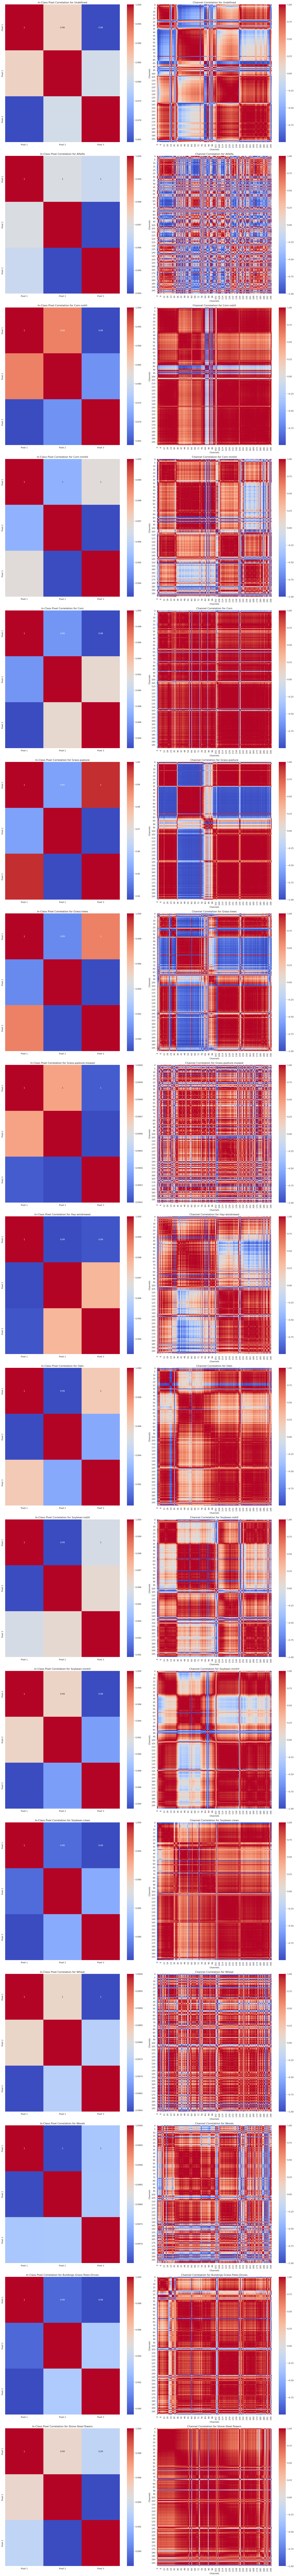

In [106]:
import seaborn as sns

# Creating cross-correlation heatmaps for each class
fig, axes = plt.subplots(nrows=len(classes), ncols=2, figsize=(20, len(classes) * 10))

for i, class_name in enumerate(classes):
    # Extract the signatures for the current class
    signatures = [hyperspectral_signatures[class_name][f"pixel{j + 1}"] for j in range(3)]

    # Calculate the cross-correlation matrix for in-class pixel correlations
    corr_matrix_pixels = np.corrcoef(signatures)

    # Plot the heatmap for in-class pixel correlations
    sns.heatmap(corr_matrix_pixels, annot=True, cmap='coolwarm', ax=axes[i, 0])
    axes[i, 0].set_title(f"In-Class Pixel Correlation for {class_name}")
    axes[i, 0].set_xticklabels([f"Pixel {j + 1}" for j in range(3)])
    axes[i, 0].set_yticklabels([f"Pixel {j + 1}" for j in range(3)])

    # Calculate the cross-correlation matrix for the channels of one pixel with the other pixels
    combined_signatures = np.vstack([signatures[0], signatures[1], signatures[2]])
    corr_matrix_channels = np.corrcoef(combined_signatures.T)

    # Plot the heatmap for channel correlations
    sns.heatmap(corr_matrix_channels, annot=False, cmap='coolwarm', ax=axes[i, 1])
    axes[i, 1].set_title(f"Channel Correlation for {class_name}")
    axes[i, 1].set_xlabel("Channels")
    axes[i, 1].set_ylabel("Channels")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


From the heatmaps above we can do two things. 
First from the one in the left we can see that the pixels from the same class are extremely correlated.
Secondly we can see that the channels of every class pixel are also extremely correlated. Which is why later on when we do PCA analysis on the signatures we end have seeing that only 3 principal components (logical rules between the channels) are enought to nearly perfectly capture the variation of every image.

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


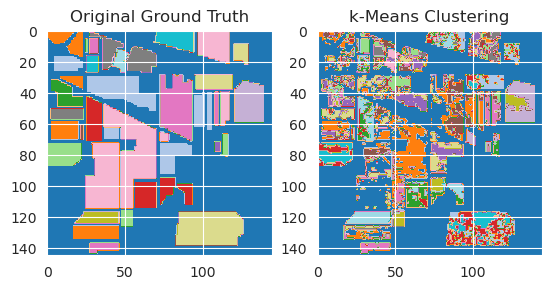

In [107]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

imgs = np.load('indian_pines_corrected.npy')
img_gt = np.load('indian_pines_gt.npy')
imgs_2d = np.reshape(imgs, (-1, 200))
img_gt_2d = img_gt.flatten()
mask = (img_gt_2d != 0)  # use only defined areas
img_gt_2d = img_gt_2d[mask] - 1  # decrease all values from the pixels by one because of the removal of undefined.
imgs_2d_defined = imgs_2d[mask]  # pick the correct pixels to get their signatures

kmeans = KMeans(n_clusters=16, random_state=42)
labels = kmeans.fit_predict(imgs_2d_defined)

kmeans_image = np.full((145, 145), -1, dtype=int)  # Blank image waiting for predictions
kmeans_image[mask.reshape((145, 145))] = labels  # The pixel's values and location in the image

plt.subplot(1, 2, 1)
plt.imshow(img_gt, cmap='tab20', vmin=1, vmax=16)
plt.title('Original Ground Truth')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_image, cmap='tab20', vmin=0, vmax=15)
plt.title('k-Means Clustering')

plt.show()

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

translated_labels = translate_predicted_labels(labels, img_gt_2d)
acc = accuracy_score(img_gt_2d, translated_labels)
print("Accuracy:", acc)

map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy: 0.3554493121280125


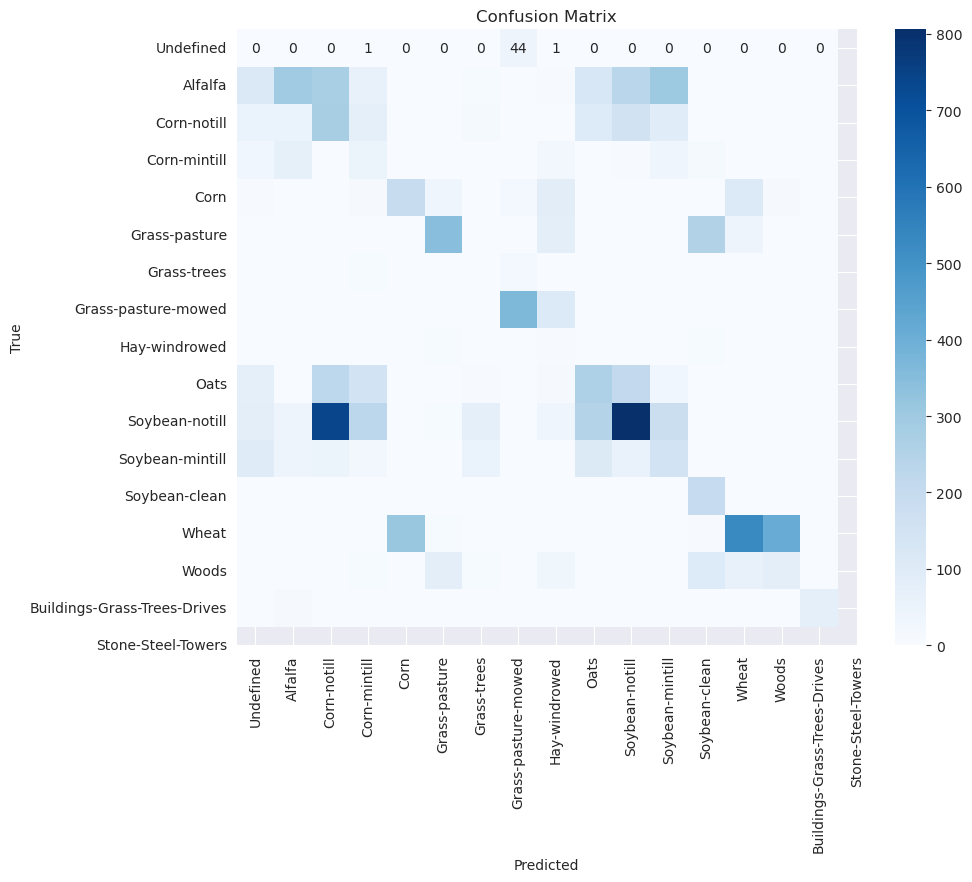

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(img_gt_2d, translated_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [110]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit_transform(imgs_2d)
explained_variance_ratio = pca.explained_variance_ratio_
print('Total explained variance with 3 components is the sum of the array so', explained_variance_ratio.sum(),'%')
explained_variance_ratio


Total explained variance with 3 components is the sum of the array so 0.9352152488891908 %


array([0.68493799, 0.23531371, 0.01496355])

From the results above we can see that the 3rd component is nearly useless but the first two have successfully captured the most important features of the dataset.
So most of the info the dataset has to provide can be represented with just 2 components of 3 features.

### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


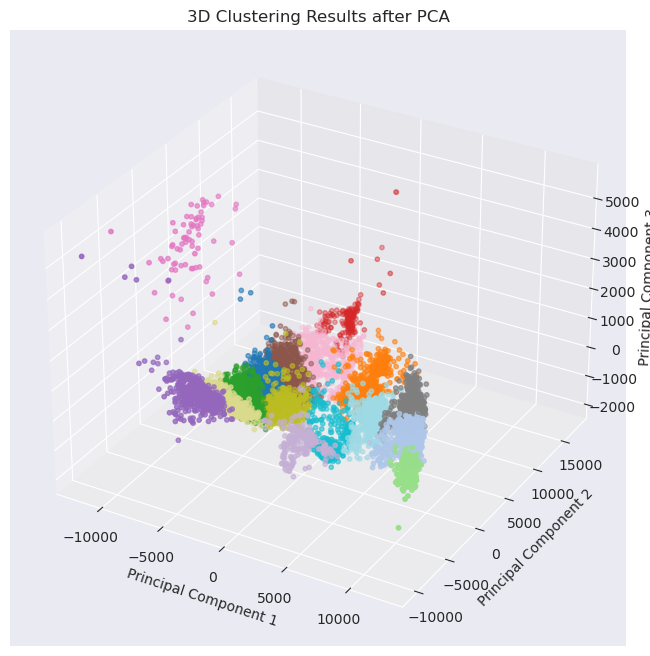


Metrics after PCA:
Accuracy: 0.3450
Adjusted Rand Score: 0.2016
Silhouette Score: 0.3746


In [111]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca_image = pca.fit_transform(imgs_2d_defined)

kmeans_pca = KMeans(n_clusters=16, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_image)

translated_labels_pca = translate_predicted_labels(labels_pca, img_gt_2d)

acc_pca = accuracy_score(img_gt_2d, translated_labels_pca)
rand_score_pca = adjusted_rand_score(img_gt_2d, labels_pca)
sil_score_pca = silhouette_score(pca_image, labels_pca)

# Visualize the clustering results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3 PCA components
ax.scatter(pca_image[:, 0], pca_image[:, 1], pca_image[:, 2], c=labels_pca, cmap='tab20', s=10)

ax.set_title('3D Clustering Results after PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

print(f"\nMetrics after PCA:")
print(f"Accuracy: {acc_pca:.4f}")
print(f"Adjusted Rand Score: {rand_score_pca:.4f}")
print(f"Silhouette Score: {sil_score_pca:.4f}")

**Evaluation Metrics for KMeans Clustering on Hyperspectral Images**

1. Rand Score (Adjusted Rand Index):
The Adjusted Rand Score measures the similarity between two data clusterings. In hyperspectral images, it compares the clustering result from the KMeans model with the ground truth. A score of 1 denotes perfect agreement. The formula for the Adjusted Rand Score is: $$ \text{Adjusted Rand Score} = \frac{\sum_{ij} \binom{n_{ij}}{2} - [\sum_{i} \binom{a_{i}}{2} \sum_{j} \binom{b_{j}}{2}] / \binom{n}{2}}{\frac{1}{2} [\sum_{i} \binom{a_{i}}{2} + \sum_{j} \binom{b_{j}}{2}] - [\sum_{i} \binom{a_{i}}{2} \sum_{j} \binom{b_{j}}{2}] / \binom{n}{2}} $$

where $n_ij$ is the number of points in both cluster $i$ and class $j$, $a_i$ is the number of points in cluster $i$, $b_j$ is the number of points in class $j$, and nn is the total number of points.

2. Silhouette Score:
The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The formula is:$$ \text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n} \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} $$


where a(i)a(i) is the average distance from the ithith point to the other points in the same cluster, and b(i)b(i) is the minimum average distance from the ithith point to points in a different cluster, minimized over clusters.

3. Accuracy (based on given Ground Truth):
Accuracy is the ratio of the number of correctly classified points to the total number of points. It is a direct measure of the clustering performance. The formula for accuracy is:
$$ \text{Accuracy} = \frac{\text{Number of correctly classified points}}{\text{Total number of points}} $$


Στην εικόνα παρατηρούμε τον νέο μετασχηματισμένο χώρο όπου τα δεδομένα μετασχηματίζονται και παρατηρούμε οτι προφανώς τα δεδομένα στον νέο χώρο έχουν μια πολύ εμφανέστερη και διακριτή συσχέτιση μεταξύ τους.

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 7
map: 2 --> 13
map: 3 --> 10
map: 4 --> 11
map: 5 --> 5
map: 6 --> 6
map: 7 --> 2
map: 8 --> 4
map: 9 --> 3
map: 10 --> 12
map: 11 --> 15
map: 12 --> 8
map: 13 --> 9
map: 14 --> 14
map: 15 --> 0


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 9
map: 3 --> 4
map: 4 --> 7
map: 5 --> 0
map: 6 --> 3
map: 7 --> 14
map: 8 --> 1
map: 9 --> 6
map: 10 --> 10
map: 11 --> 8
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 2


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 12
map: 3 --> 5
map: 4 --> 3
map: 5 --> 1
map: 6 --> 4
map: 7 --> 6
map: 8 --> 9
map: 9 --> 0
map: 10 --> 7
map: 11 --> 8
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 2


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 5
map: 1 --> 10
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 2
map: 6 --> 11
map: 7 --> 7
map: 8 --> 14
map: 9 --> 12
map: 10 --> 6
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 8


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 0
map: 1 --> 9
map: 2 --> 14
map: 3 --> 11
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 10
map: 8 --> 7
map: 9 --> 12
map: 10 --> 6
map: 11 --> 3
map: 12 --> 1
map: 13 --> 15
map: 14 --> 13
map: 15 --> 8


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 4
map: 3 --> 0
map: 4 --> 9
map: 5 --> 1
map: 6 --> 6
map: 7 --> 2
map: 8 --> 14
map: 9 --> 11
map: 10 --> 12
map: 11 --> 8
map: 12 --> 3
map: 13 --> 7
map: 14 --> 15
map: 15 --> 13


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 3
map: 2 --> 6
map: 3 --> 1
map: 4 --> 11
map: 5 --> 9
map: 6 --> 12
map: 7 --> 5
map: 8 --> 10
map: 9 --> 8
map: 10 --> 7
map: 11 --> 2
map: 12 --> 14
map: 13 --> 4
map: 14 --> 0
map: 15 --> 15


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 3
map: 3 --> 0
map: 4 --> 1
map: 5 --> 12
map: 6 --> 6
map: 7 --> 9
map: 8 --> 4
map: 9 --> 7
map: 10 --> 15
map: 11 --> 8
map: 12 --> 2
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13
[0.18400900122316877, 0.18624156722043597, 0.20159043693986198, 0.20229208593878023, 0.2032714989143739, 0.20391590658593903, 0.20436977615853705, 0.2042997476932686, 0.20443676570043967, 0.20471162622470485]
[0.5294956205308438, 0.3677906337873979, 0.37462521716855846, 0.3693294208073539, 0.36581420484013505, 0.3624358878477507, 0.35227984884044206, 0.346272994912825, 0.340189870459319, 0.3383430120615321]
[0.33769148209581423, 0.31642111425504926, 0.3450092691969948, 0.34403356425017073, 0.34530198068104206, 0.34618011513318375, 0.3468631085959606, 0.3458874036491365, 0.34657039711191334, 0.3470582495853254]


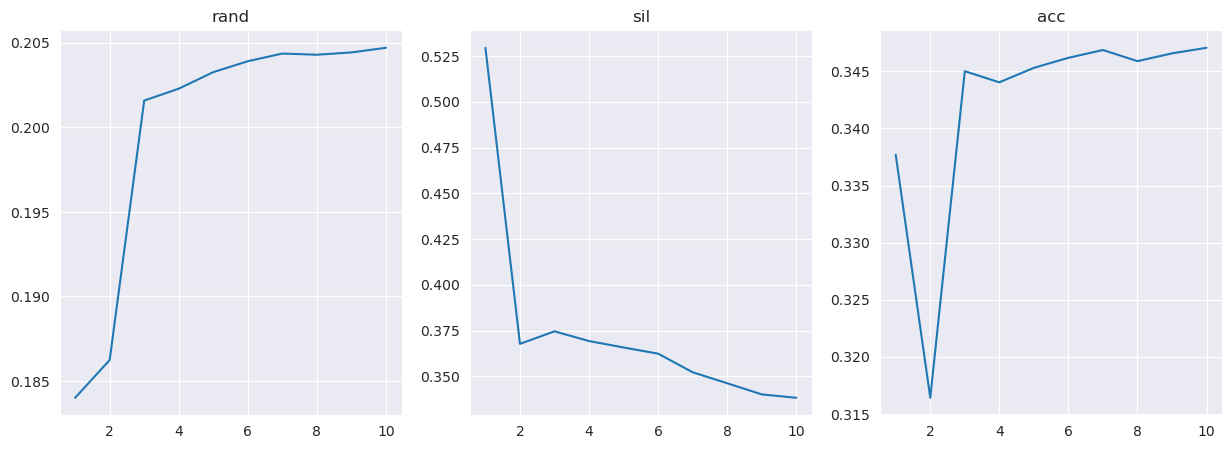

In [112]:
rand_scores = []
silhouette_scores = []
acc_scores = []
n_values = np.arange(1, 11)
for n in n_values:
    pca = PCA(n_components=n)
    pca_transformed_data = pca.fit_transform(imgs_2d_defined)

    kmeans = KMeans(n_clusters=16, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_transformed_data)

    translated_labels = translate_predicted_labels(cluster_labels, img_gt_2d)

    rand_score = adjusted_rand_score(img_gt_2d, translated_labels)
    rand_scores.append(rand_score)
    silhouette_score_value = silhouette_score(pca_transformed_data, cluster_labels)
    silhouette_scores.append(silhouette_score_value)


    acc = accuracy_score(img_gt_2d, translated_labels)
    acc_scores.append(acc)


print(rand_scores)
print(silhouette_scores)
print(acc_scores)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(n_values, rand_scores)
plt.title('rand')
plt.subplot(132)
plt.plot(n_values, silhouette_scores)
plt.title('sil')
plt.subplot(133)
plt.plot(n_values, acc_scores)
plt.title('acc')

plt.show()

Παρατηρούμε μέγιστη απόδοση για n_components = 5 κάτι το οποίο είναι αρκετά ανεξάρτητο του n_clusters